#                                            $$ Titanic$$$$ Case$$$$ Study $$

In this case study we need to identify the probability of variaous dependent variables in dataset with respect to other independent variable

In [74]:
#importing important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Loading titanic dataset

In [75]:
dataset=pd.read_csv("train.csv")

In [76]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [77]:
dataset.shape

(889, 12)

# Checking for null values in dataset

In [78]:
dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

### more no. of null values pressent in column Cabin 
### therefore,, we can drop this entire column

In [79]:
del dataset["Cabin"]

In [80]:
dataset.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,S


### Now drop unwanted columns that are irrelevant 

In [81]:
dataset.drop(["PassengerId","Name","Ticket"],axis=1,inplace=True)

In [82]:
dataset.head(1)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.25,S


In [83]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    object 
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.7+ KB


# Convert text data into numeriacl data

In [84]:
from sklearn.preprocessing import LabelEncoder
lab=LabelEncoder()

dataset.Sex=lab.fit_transform(dataset.Sex)
dataset.Embarked=lab.fit_transform(dataset.Embarked)

In [85]:
dataset.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [86]:
dataset.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

# KNN

In [87]:
from sklearn.model_selection import train_test_split
from sklearn import neighbors
from sklearn.metrics import accuracy_score,confusion_matrix

In [88]:
def knn(n):
    y=dataset["Pclass"]
    x=dataset.drop(["Pclass"],axis=1)
    r=list()
    d=list()
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)
    
    k=n
    while k>=1:
        print("For testing with K= ",k)
        knn1=neighbors.KNeighborsClassifier(n_neighbors=k)
        knn1.fit(x_train,y_train)
        ypred=knn1.predict(x_test)
        sc=accuracy_score(y_test,ypred)
        r.append(sc)
        d.append(k)
        print("Accuracy score for k={} is {} ".format(k,sc))
        print("*"*50,end="\n\n")
        k=k-1
    plt.plot(d,r,color="r")
    plt.xlabel("K values")
    plt.ylabel("Accuracy score")
    plt.title("k val vs Accuracy score")
    plt.show()
    maximum=max(r)
    indexx=268-r.index(max(r))
    print("\n maximum accuracy is {} for k={} ".format(maximum,indexx))
  
    
        
        
        

For testing with K=  268
Accuracy score for k=268 is 0.7191011235955056 
**************************************************

For testing with K=  267
Accuracy score for k=267 is 0.7153558052434457 
**************************************************

For testing with K=  266
Accuracy score for k=266 is 0.7153558052434457 
**************************************************

For testing with K=  265
Accuracy score for k=265 is 0.7191011235955056 
**************************************************

For testing with K=  264
Accuracy score for k=264 is 0.7191011235955056 
**************************************************

For testing with K=  263
Accuracy score for k=263 is 0.7191011235955056 
**************************************************

For testing with K=  262
Accuracy score for k=262 is 0.7191011235955056 
**************************************************

For testing with K=  261
Accuracy score for k=261 is 0.7191011235955056 
**************************************************



Accuracy score for k=200 is 0.7191011235955056 
**************************************************

For testing with K=  199
Accuracy score for k=199 is 0.7191011235955056 
**************************************************

For testing with K=  198
Accuracy score for k=198 is 0.7228464419475655 
**************************************************

For testing with K=  197
Accuracy score for k=197 is 0.7228464419475655 
**************************************************

For testing with K=  196
Accuracy score for k=196 is 0.7228464419475655 
**************************************************

For testing with K=  195
Accuracy score for k=195 is 0.7228464419475655 
**************************************************

For testing with K=  194
Accuracy score for k=194 is 0.7303370786516854 
**************************************************

For testing with K=  193
Accuracy score for k=193 is 0.7415730337078652 
**************************************************

For testing with K=  192


**************************************************

For testing with K=  134
Accuracy score for k=134 is 0.7565543071161048 
**************************************************

For testing with K=  133
Accuracy score for k=133 is 0.7602996254681648 
**************************************************

For testing with K=  132
Accuracy score for k=132 is 0.7602996254681648 
**************************************************

For testing with K=  131
Accuracy score for k=131 is 0.7602996254681648 
**************************************************

For testing with K=  130
Accuracy score for k=130 is 0.7602996254681648 
**************************************************

For testing with K=  129
Accuracy score for k=129 is 0.7528089887640449 
**************************************************

For testing with K=  128
Accuracy score for k=128 is 0.7528089887640449 
**************************************************

For testing with K=  127
Accuracy score for k=127 is 0.7490636704119851 


Accuracy score for k=62 is 0.7602996254681648 
**************************************************

For testing with K=  61
Accuracy score for k=61 is 0.7602996254681648 
**************************************************

For testing with K=  60
Accuracy score for k=60 is 0.7640449438202247 
**************************************************

For testing with K=  59
Accuracy score for k=59 is 0.7602996254681648 
**************************************************

For testing with K=  58
Accuracy score for k=58 is 0.7677902621722846 
**************************************************

For testing with K=  57
Accuracy score for k=57 is 0.7752808988764045 
**************************************************

For testing with K=  56
Accuracy score for k=56 is 0.7752808988764045 
**************************************************

For testing with K=  55
Accuracy score for k=55 is 0.7715355805243446 
**************************************************

For testing with K=  54
Accuracy score f

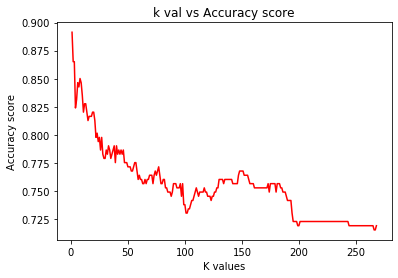


 maximum accuracy is 0.8913857677902621 for k=1 


In [89]:
knn(268)

# Result:
1. Maximum accuracy is encountered for k=1 which is  0.8913857677902621.
2. same Accuracy score is wncountered when k=5.
3. We will chose k=5 as k=1 overfits the data.
    